In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [5]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75


### property_type vs price

<Axes: xlabel='property_type', ylabel='price'>

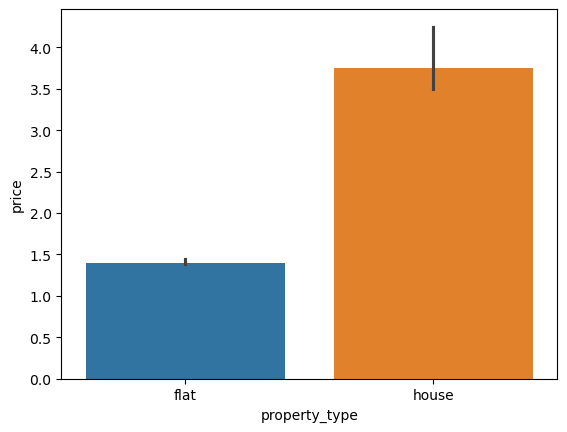

In [6]:
sns.barplot(x='property_type', y='price', data=df, estimator=np.median, hue='property_type')

<Axes: xlabel='property_type', ylabel='price'>

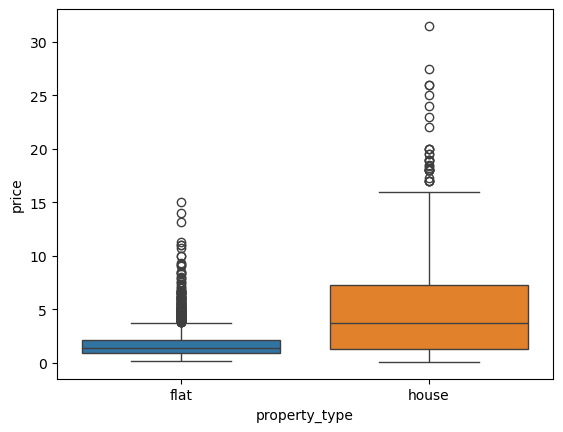

In [7]:
sns.boxplot(x='property_type', y='price', data=df, hue='property_type')

### property_type vs area

<Axes: xlabel='property_type', ylabel='built_up_area'>

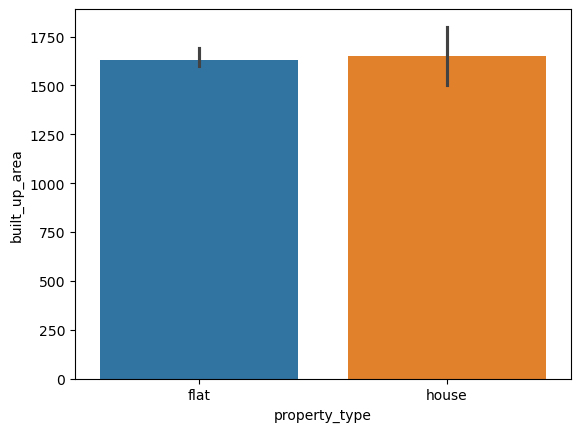

In [8]:
sns.barplot(x='property_type', y='built_up_area', data=df, estimator=np.median,hue='property_type')

<Axes: xlabel='property_type', ylabel='built_up_area'>

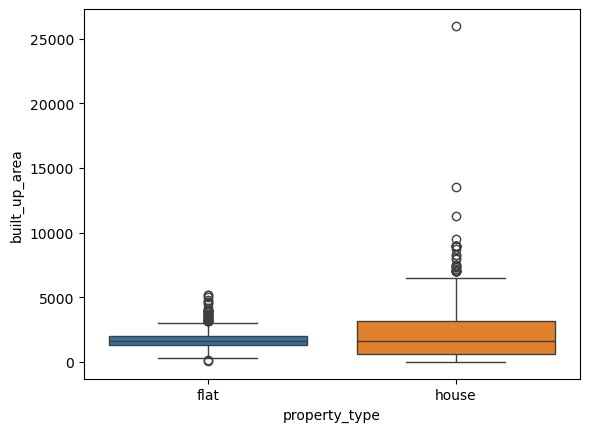

In [9]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'],data=df,hue='property_type')

In [10]:
# Calculate quartiles and IQR
Q1 = df['built_up_area'].quantile(0.25)
Q3 = df['built_up_area'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['built_up_area'] < lower_bound) | (df['built_up_area'] > upper_bound)]

# Print outliers
outliers

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
21,independent,house,1.45,557.0,Plot area 26000(2415.48 sq.m.),26032.0,4,4,2,2.0,East,Moderately Old,NaN,sector 3,NaN,26000.0,NaN,0,1,0,1,0,0,62
44,emaar mgf marbella,house,18.00,40000.0,Plot area 500(418.06 sq.m.),4500.0,5,6,3+,3.0,North-East,Relatively New,NaN,sector 66,NaN,4500.0,NaN,1,1,1,1,0,1,153
68,emaar mgf marbella,house,NaN,NaN,Plot area 350(292.64 sq.m.)Built Up area: 6500...,NaN,4,4,3+,3.0,North,New Property,NaN,sector 66,NaN,6500.0,NaN,1,1,1,1,0,0,136
72,unitech uniworld resorts,house,9.55,19293.0,Plot area 550(459.87 sq.m.),4950.0,6,7,3+,2.0,East,Relatively New,NaN,sector 33,NaN,4950.0,NaN,1,1,1,1,0,2,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,independent,house,5.25,11666.0,Plot area 1944(180.6 sq.m.)Built Up area: 4650...,4500.0,9,9,3+,4.0,East,Relatively New,NaN,sector 47,NaN,4650.0,4500.0,0,1,0,0,0,2,142
3460,independent,house,15.00,33333.0,Built Up area: 4500 (418.06 sq.m.),4500.0,4,4,3,3.0,NaN,Moderately Old,NaN,sector 26,NaN,4500.0,NaN,0,1,1,0,0,2,36
3467,sector 15 part 2 rwa,house,10.00,22222.0,Plot area 502(419.74 sq.m.),4500.0,5,5,2,2.0,East,Old Property,NaN,sector 15,NaN,4518.0,NaN,0,0,0,0,0,0,49
3471,independent,house,7.00,10000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,7000.0,10,11,3+,4.0,South-East,Relatively New,NaN,sector 39,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [11]:
# removing that crazy outlier
df[df['built_up_area'] != 737147]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,adani m2k oyster grande,flat,4.55,10000.0,Super Built up area 4650(432 sq.m.)Built Up ar...,4550.0,4,4,3+,11.0,North-East,Relatively New,V70001746,sector 102,4650.0,4630.0,4550.0,0,0,0,0,0,2,60
3476,signature global solera,flat,0.25,7862.0,Built Up area: 318 (29.54 sq.m.),318.0,1,1,0,0.0,NaN,Undefined,V69417148,sector 107,NaN,318.0,NaN,0,0,0,0,0,0,55
3477,housing board colony,house,5.50,30556.0,Plot area 200(167.23 sq.m.),1800.0,4,3,3,2.0,North,Old Property,NaN,sector 28,NaN,1800.0,NaN,0,0,0,1,1,2,22
3478,bestech park view grand spa,flat,4.70,6786.0,Super Built up area 6926(643.45 sq.m.),6926.0,4,4,3+,19.0,North,Relatively New,R61758448,sector 81,6926.0,NaN,NaN,0,1,0,0,0,2,140


In [12]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

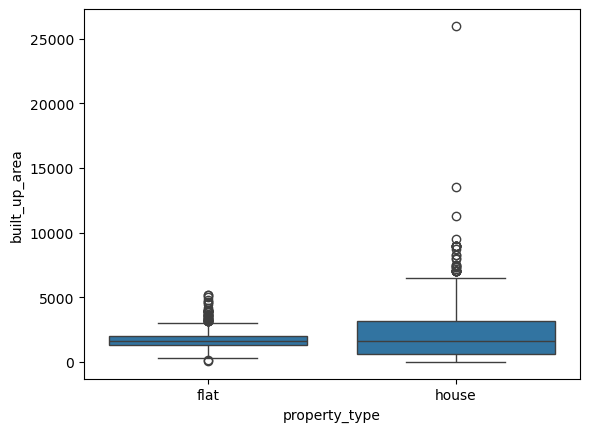

In [13]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

### property_type vs price_per_sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

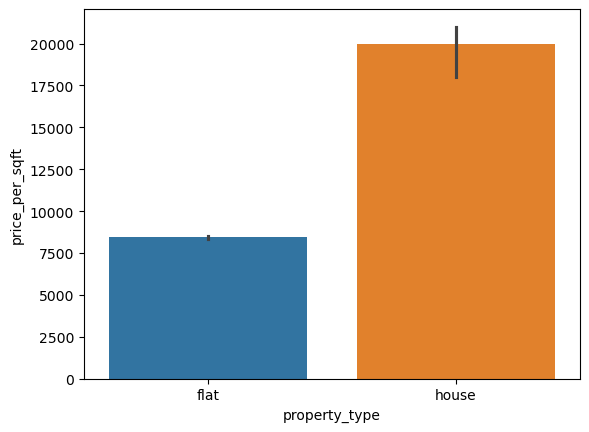

In [14]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median,data=df,hue='property_type')

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

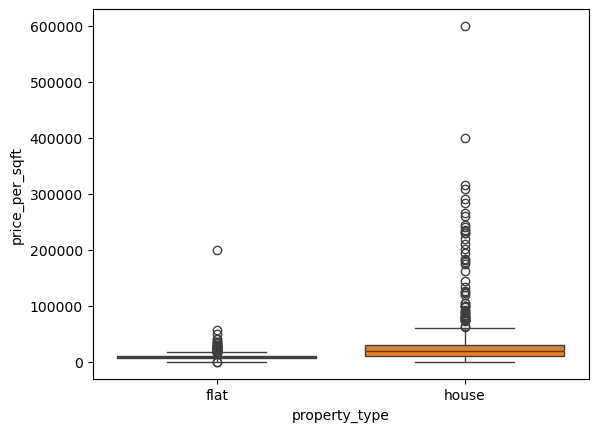

In [15]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'],data=df,hue='property_type')

In [16]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
301,flat,ambience caitriona,sector 24,14.00,200000.0,700.0,Built Up area: 700 (65.03 sq.m.),NaN,700.0,NaN
448,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),NaN,270.0,NaN
692,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),NaN,250.0,NaN
750,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,NaN,347.0,215.0
850,house,rk excelo,sector 12,0.60,120000.0,50.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,NaN,30.0,15.0
855,house,independent,sector 17,3.50,218750.0,160.0,Built Up area: 160 (14.86 sq.m.),NaN,160.0,NaN
856,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),NaN,240.0,NaN
921,house,independent,sector 10,0.65,144444.0,45.0,Plot area 45(4.18 sq.m.),NaN,45.0,NaN
980,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),NaN,232.0,NaN
1027,house,independent,sector 54,3.75,234375.0,160.0,Plot area 160(14.86 sq.m.),NaN,160.0,NaN


In [17]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75


<Axes: xlabel='bedRoom', ylabel='property_type'>

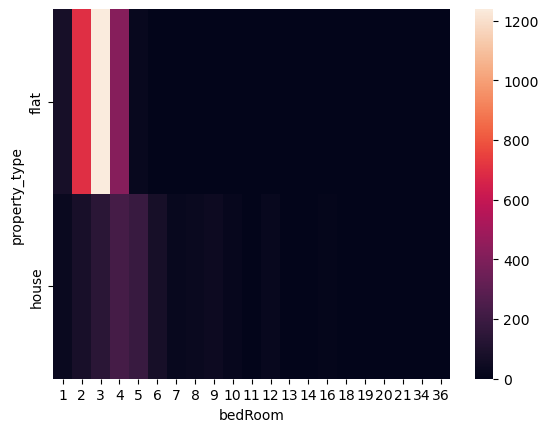

In [18]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

In [19]:
# checking outliers
df[df['bedRoom'] >= 10]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,independent,house,26.00,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,3150.0,16,16,3+,4.0,North-West,New Property,NaN,sector 26,NaN,400.0,350.0,1,1,1,1,0,2,72
62,dlf city plots phase 3,house,5.00,34083.0,Plot area 163(136.29 sq.m.),1467.0,13,13,3+,4.0,North,New Property,NaN,sector 24,NaN,1467.0,NaN,0,0,0,1,0,1,91
90,ganpati heights apartment,house,1.25,151.0,Plot area 115(7692.86 sq.m.),82781.0,10,6,2,3.0,South-East,Old Property,NaN,sector 13,NaN,115.0,NaN,0,0,0,0,1,0,7
98,independent,house,2.25,6944.0,Carpet area: 360 (301.01 sq.m.),3240.0,10,10,2,1.0,East,Undefined,NaN,sector 13,NaN,NaN,360.0,0,0,0,0,0,0,0
198,laxmi garden sector-11,house,1.50,12820.0,Plot area 130(108.7 sq.m.),1170.0,12,9,1,3.0,East,Relatively New,NaN,laxmi garden,NaN,1170.0,NaN,1,1,0,1,1,2,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,shivpuri,house,2.80,12444.0,Plot area 2250(209.03 sq.m.),2250.0,10,7,3,1.0,NaN,Old Property,NaN,shivpuri,NaN,2250.0,NaN,1,1,0,1,1,2,0
3163,independent,house,11.95,43534.0,Plot area 305(255.02 sq.m.),2745.0,12,12,3+,4.0,West,Relatively New,NaN,sector 56,NaN,2745.0,NaN,0,1,0,0,0,2,21
3395,independent,house,16.00,59259.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,2700.0,16,16,3+,4.0,West,New Property,NaN,sector 25,NaN,325.0,300.0,1,1,1,1,0,2,72
3441,independent,house,5.00,43066.0,Plot area 129(107.86 sq.m.),1161.0,21,21,3+,5.0,North,Relatively New,NaN,sector 54,NaN,1161.0,NaN,0,1,0,0,0,1,49


<Axes: xlabel='property_type', ylabel='floorNum'>

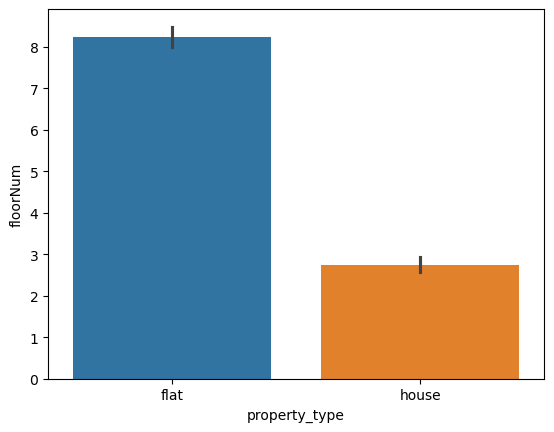

In [20]:
sns.barplot(x=df['property_type'],y=df['floorNum'],data=df,hue='property_type')

<Axes: xlabel='property_type', ylabel='floorNum'>

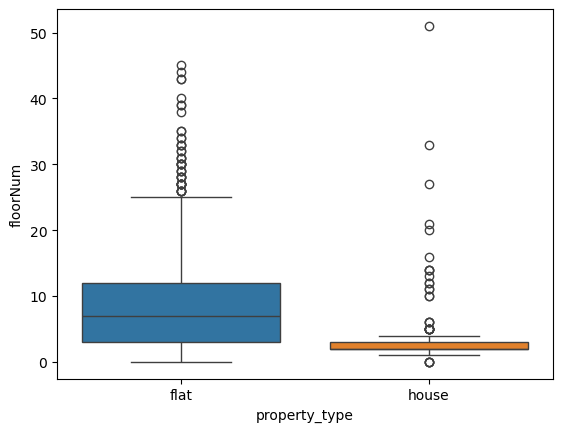

In [21]:
sns.boxplot(x=df['property_type'],y=df['floorNum'],data=df,hue='property_type')

In [22]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
532,vatika the seven lamps,house,1.60,6597.0,Plot area 2425(225.29 sq.m.),2425.0,4,4,3+,16.0,North,Moderately Old,NaN,sector 82,NaN,2425.0,NaN,0,1,0,0,0,0,94
557,independent,house,1.80,7627.0,Built Up area: 2360 (219.25 sq.m.),2360.0,4,5,0,13.0,NaN,Undefined,NaN,sector 92,NaN,2360.0,NaN,0,0,0,0,0,0,0
663,spaze privy,house,3.10,8486.0,Plot area 3653(339.37 sq.m.),3653.0,5,5,3+,21.0,NaN,Relatively New,NaN,sector 72,NaN,3653.0,NaN,0,0,0,0,0,0,0
709,suncity avenue 76,house,0.75,10067.0,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,745.0,2,2,2,11.0,North-East,New Property,NaN,sector 76,NaN,745.0,NaN,0,0,0,0,0,0,40
724,ireo victory valley,house,8.00,22222.0,Plot area 400(334.45 sq.m.),3600.0,6,7,3+,51.0,North-East,Moderately Old,NaN,sector 67,NaN,3600.0,NaN,1,1,0,1,0,2,49
888,suncity township,house,2.00,30968.0,Plot area 60Built Up area: 60 sq.m.Carpet area...,646.0,9,9,3,11.0,North,Relatively New,NaN,sector 54,NaN,60.0,59.0,0,1,0,0,0,1,7
1011,godrej meridien,house,5.60,14000.0,Plot area 4000(371.61 sq.m.),4000.0,5,4,3+,33.0,North-East,New Property,NaN,sector 106,NaN,4000.0,NaN,1,1,1,1,0,0,151
1179,ats tourmaline,house,1.87,8697.0,Built Up area: 2150 (199.74 sq.m.),2150.0,3,4,0,12.0,NaN,Undefined,NaN,sector 109,NaN,2150.0,NaN,0,0,0,0,0,0,0
2184,ninex city,house,1.75,6250.0,Carpet area: 2800 (260.13 sq.m.),2800.0,4,4,0,14.0,NaN,Undefined,NaN,sector 76,NaN,NaN,2800.0,0,0,0,0,0,0,0
2432,greenopolis,house,0.70,5397.0,Built Up area: 1297 (120.5 sq.m.),1297.0,2,2,2,14.0,North-East,Undefined,NaN,sector 89,NaN,1297.0,NaN,0,0,0,0,0,0,0


In [23]:
# conclusion houses(villa) but in appartments

In [24]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75


In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

In [ ]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

In [ ]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

In [ ]:
sns.barplot(x=df['property_type'],y=df['luxury_score'],data=df,hue='property_type')

In [ ]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'],data=df,hue='property_type')

In [ ]:
df.head()

In [ ]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

In [ ]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()


In [ ]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

In [ ]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

In [ ]:
df.head()

### price

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price', hue='bedRoom')

In [ ]:
sns.scatterplot(x=df[df['area'] < 10000]['area'], y=df['price'], hue=df['agePossession'])

In [ ]:
# Use 'x', 'y', 'hue', and 'data' explicitly
sns.scatterplot(x=df[df['area'] < 10000]['area'],
                y=df[df['area'] < 10000]['price'],
                hue=df[df['area'] < 10000]['furnishing_type'].astype('category'))

In [ ]:
sns.barplot(x=df['bedRoom'], y=df['price'], estimator=np.median,data=df,hue=df['bedRoom'])

In [ ]:
sns.barplot(x=df['agePossession'], y=df['price'], estimator=np.median,data=df,hue='agePossession')
plt.xticks(rotation='vertical')

In [ ]:
sns.barplot(x=df['agePossession'], y=df['area'], estimator=np.median,data=df,hue='agePossession')
plt.xticks(rotation='vertical')

In [ ]:
sns.barplot(x=df['furnishing_type'], y=df['price'], estimator=np.median,data=df,hue='furnishing_type')

In [ ]:
sns.scatterplot(x=df['luxury_score'], y=df['price'],data=df,hue='luxury_score')

### correlation

In [ ]:
numeric_df = df.select_dtypes(include='number')

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_df.corr())
plt.show()

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()['price'].sort_values(ascending=False)

In [ ]:
df.head()

In [ ]:
sns.pairplot(df)